In [2]:
import numpy as np
import pandas as pd
import deepchem as dc

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [3]:
# Read in the data.
df = pd.read_csv('./data/clean_henrys.csv', index_col=0)

In [5]:
feat = dc.feat.RDKitDescriptors()
chem_descriptions = feat.featurize(df['canonical_smiles'])

In [6]:
y = np.log10(df['value'])

In [7]:
x_clean = []
y_clean = []
for cd, hl in zip(chem_descriptions, y):
    if np.isnan(np.min(cd)) or np.isnan(np.max(cd)):
        continue
    
    x_clean.append(cd)
    y_clean.append(hl)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

In [80]:
model = KNeighborsRegressor(10)

model.fit(X_train, y_train)


model.score(X_test, y_test)

0.5035534929313803

In [81]:
mean_squared_error(model.predict(X_test), y_test)

1.6581433552755027

In [82]:
from sklearn.linear_model import Lasso

In [102]:
clf = Lasso(alpha=0.01, max_iter=100000)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7385880672937049

In [96]:
mean_squared_error(clf.predict(X_test), y_test)

0.8731221854417376

In [137]:
mean_squared_error(clf.predict(X_train), y_train)

0.6143647877859607

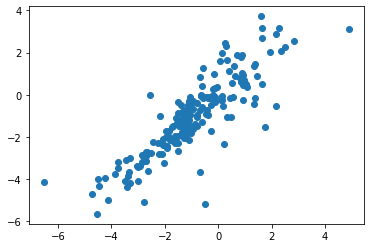

In [97]:


plt.scatter(clf.predict(X_test), y_test)

In [138]:
from sklearn.linear_model import Ridge

clf = Ridge(5)

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7526303633379454

In [140]:
clf.score(X_train, y_train)

0.8660910227179299

In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.8609680555012685

In [8]:
mean_squared_error(rf.predict(X_test), y_test)

0.46437006134427106

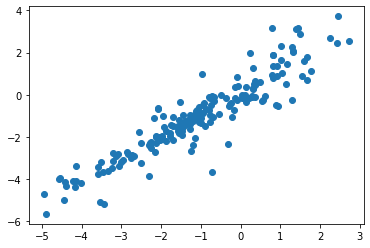

In [11]:
plt.scatter(rf.predict(X_test), y_test)

Well, given a lot of chemical data, we can build a model with an R2 value of 0.86 on the test set...that's pretty darn good.

Why is something like this not used by the EPA? The EPA seems to have gone with the OPERA model because it's reportedly more interpretable. It also uses the fingerprints, right?

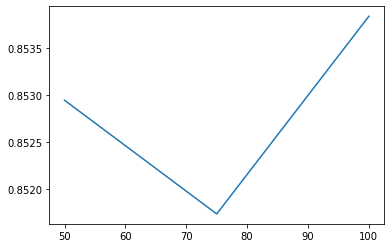

In [30]:
num_est = [50, 75, 100]

scores = []
for n in num_est:
    rf = RandomForestRegressor(n_estimators=n)
    
    rf.fit(X_train, y_train)
    
    scores.append(rf.score(X_test, y_test))
    
plt.plot(num_est, scores)

<BarContainer object of 10 artists>

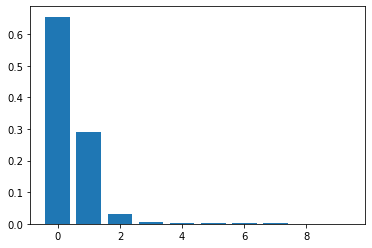

In [22]:
pca = PCA(n_components=10)

pca.fit(X_train)

plt.bar(range(0,10), pca.explained_variance_ratio_)

# Creating a graph convolutional model

In [5]:
from deepchem.models.torch_models import GCNModel

In [6]:
feat = dc.feat.MolGraphConvFeaturizer()
chem_descriptions = feat.featurize(df['canonical_smiles'])

Failed to featurize datapoint 140, [Kr]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 163, [Xe]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 203, [Ne]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 577, N. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 597, [Hg]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize datapoint 693, [He]. Appending empty array
Exception message: More than one atom should be present in the molecule for this featurizer to work.
Failed to featurize

In [7]:
x_clean = []
y_clean = []
for x_val, y_val in zip(chem_descriptions, y):
    if type(x_val) == dc.feat.graph_data.GraphData:
        x_clean.append(x_val)
        y_clean.append(y_val)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x_clean, y_clean, test_size=0.2, random_state=42)

In [10]:
train_dataset = dc.data.NumpyDataset(X=X_train, y=y_train)
test_dataset = dc.data.NumpyDataset(X=X_test, y=y_test)

In [11]:
model = GCNModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


0.37526817321777345

In [13]:
preds = model.predict_on_batch(X_test)

In [14]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test, preds)

0.7931481772876514

In [17]:
from deepchem.models.torch_models import GATModel

model = GATModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


0.9364861297607422

In [18]:
preds = model.predict_on_batch(X_test)
r2_score(y_test, preds)

0.7138633424101157

In [19]:
from deepchem.models.torch_models import MPNNModel

model = GATModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

/opt/anaconda3/envs/deepchem/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


1.0132347869873046

In [20]:
preds = model.predict_on_batch(X_test)
r2_score(y_test, preds)

0.7154113354501642

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(preds, y_test)

1.012480917939502